In [1]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt

# 2.a

In [ ]:
input_2a = np.array([49, -67, 8, 16, 6, 23, 28, 41, 14, 29, 56, 24, 75, 60, -48])
Sample_s = input_2a.shape[0]
sample_m = np.mean(input_2a)
sample_v = np.var(input_2a)
print("Sample size:", Sample_s, "Sample mean:", round(sample_m,2), "Sample variance:", round(sample_v,2))

# Our multivariate t-distribution:
num = int(1e7)
Mt_rv = stats.multivariate_t.rvs(loc = [sample_m], shape = [sample_v/15], df = 14, size = num)

Mt_rv_lb = np.percentile(Mt_rv, 2.5)
Mt_rv_ub = np.percentile(Mt_rv, 97.5)
Mt_rv_lb, Mt_rv_ub

# 3.a

In [2]:
input_3a1 = np.array([2, 4, 4, 5, 6, 8, 13])
input_3a2 = np.array([0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 8])

s_square = (np.sum((input_3a1 - np.mean(input_3a1))**2) 
            + np.sum((input_3a2 - np.mean(input_3a2))**2))/18
np.mean(input_3a1), np.mean(input_3a2),s_square*(1/7+1/13)

(6.0, 2.230769230769231, 1.6398985629754863)

In [14]:
t_ci_lb = stats.t.ppf(0.025, df = 18, loc= np.mean(input_3a1) - np.mean(input_3a2), scale= np.sqrt(s_square*(1/7+1/13)))
t_ci_ub = stats.t.ppf(0.975, 18, loc= np.mean(input_3a1) - np.mean(input_3a2), scale= np.sqrt(s_square*(1/7+1/13)))
prob = 1 - stats.t.cdf(0, 18, loc= np.mean(input_3a1) - np.mean(input_3a2), scale= np.sqrt(s_square*(1/7+1/13)))
t_ci_lb, t_ci_ub, prob

(1.0788210091286077, 6.459640529332931, 0.995654653570389)

# 3.b

In [3]:
mu1 = np.random.standard_t(6, 1000000)*np.sqrt(np.var(input_3a1, ddof=1)/7) + np.mean(input_3a1)
mu2 = np.random.standard_t(12, 1000000)*np.sqrt(np.var(input_3a2, ddof=1)/13) + np.mean(input_3a2)
diff = mu1 - mu2
lb = np.percentile(diff, 2.5)
ub = np.percentile(diff, 97.5)
lb, ub, len(diff[diff>0])/len(diff)

(0.20386055318589785, 7.334169332282351, 0.979465)

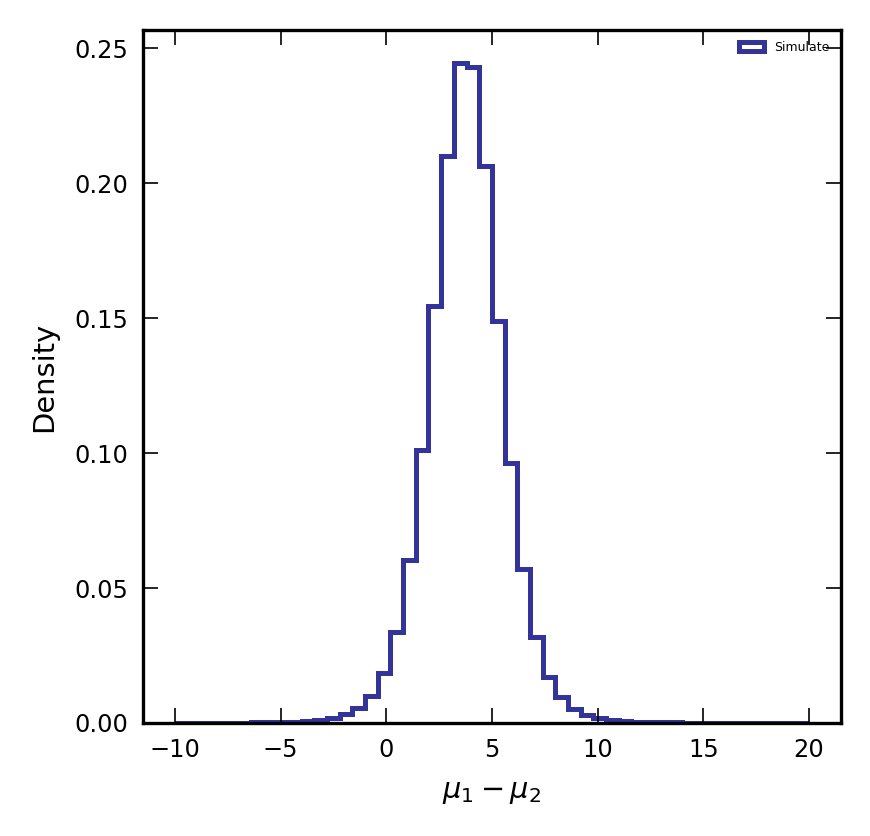

In [4]:
f, ax = plt.subplots(1, 1, figsize=(3, 3), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
diff.sort()
ax.hist(diff, density= 1,range = (-10,20), bins=50, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 0,label = "Simulate")
ax.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax.set_xlabel(r"$\mu_1 - \mu_2$", size='x-small')   
ax.set_ylabel("Density", size='x-small')
#         ax.set_xlim(x_range)
#         ax.set_ylim(y_range)
ax.legend(loc = 1 ,fontsize = 3,markerscale = 2,ncol = 3,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
plt.show()

# 3.c pic

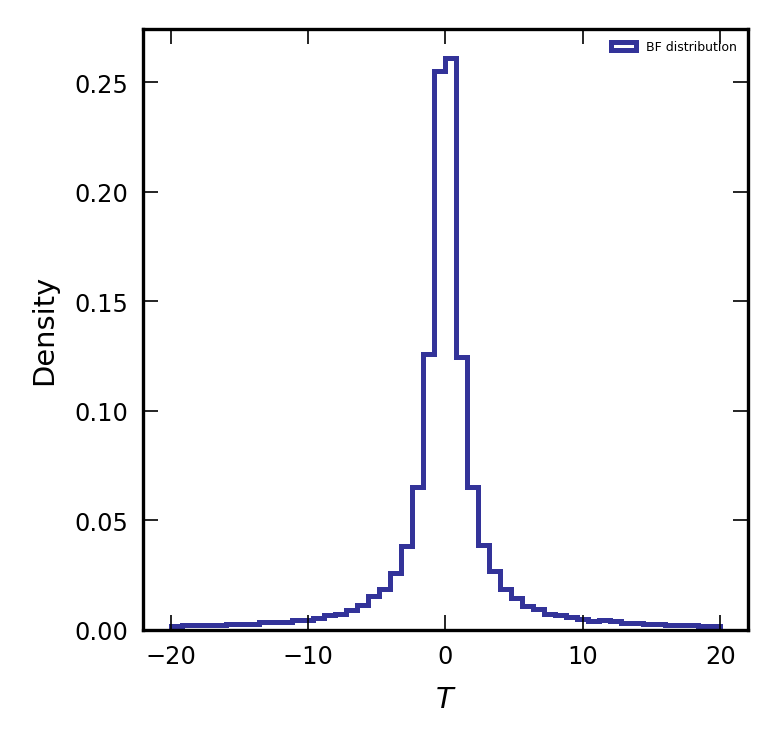

In [8]:
f_1 = 1.451
f_2 = 0.79
a = 1.02
b = 0.65
T_a = np.random.standard_t(b, 100000)
BF = a* np.random.standard_t(b, 100000)

f, ax = plt.subplots(1, 1, figsize=(2.6, 2.6), facecolor='white', dpi=300, gridspec_kw={'hspace': 0., 'wspace': 0.})
BF.sort()
ax.hist(BF, density= 1,range = (-20,20), bins=50, histtype='step',lw= 1.2,color='navy', alpha=0.8, zorder = 0,label = "BF distribution")
ax.tick_params(axis='both', which='both', labelsize='xx-small', right=True, top=True, direction='in', width=.4)   
ax.set_xlabel(r"$T$", size='x-small')   
ax.set_ylabel("Density", size='x-small')
#         ax.set_xlim(x_range)
#         ax.set_ylim(y_range)
ax.legend(loc = 1 ,fontsize = 3,markerscale = 2,ncol = 3,scatterpoints= 1,frameon = True,framealpha =0.).get_frame().set_linewidth(0.0)
plt.show()

In [ ]:
0.20386055318589785- 7.334169332282351